In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-dj2zt48q
Note: you may need to restart the kernel to use updated packages.


  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17001 sha256=0ff45202577175907ff7da9913ca5fee3a64fbfc5f99b1d384ed207b3e852dd2
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-9axns39h\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [6]:
def example_grover_iteration():
    """Small circuit with 5/16 solutions"""
    # Do circuit
    qc = QuantumCircuit(4)
    # Oracle
    qc.h([2,3])
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(2)
    qc.ccx(0,2,3)
    qc.x(2)
    qc.h(3)
    qc.x([1,3])
    qc.h(2)
    qc.mct([0,1,3],2)
    qc.x([1,3])
    qc.h(2)
    # Diffuser
    qc.h(range(3))
    qc.x(range(3))
    qc.z(3)
    qc.mct([0,1,2],3)
    qc.x(range(3))
    qc.h(range(3))
    qc.z(3)
    return qc

In [7]:
# Create controlled-Grover
grit = example_grover_iteration().to_gate()
cgrit = grit.control()
cgrit.label = "Grover"

In [12]:
  def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(4)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit   

In [13]:
qft_dagger = qft(4).to_gate().inverse()
qft_dagger.label = "QFT†"

In [15]:
# Create QuantumCircuit
t = 4   # no. of counting qubits
n = 4   # no. of searching qubits
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

# Initialise all qubits to |+>
for qubit in range(t+n):
    qc.h(qubit)

# Begin controlled Grover iterations
iterations = 1
for qubit in range(t):
    for i in range(iterations):
        qc.append(cgrit, [qubit] + [*range(t, n+t)])
    iterations *= 2
    
# Do inverse QFT on counting qubits
qc.append(qft_dagger, range(t))

# Measure counting qubits
qc.measure(range(t), range(t))

# Display the circuit
qc.draw()

┌───┐┌─────────┐                                                       »
q_0: ┤ H ├┤0        ├───────────────────────────────────────────────────────»
     ├───┤│         │┌─────────┐┌─────────┐                                 »
q_1: ┤ H ├┤         ├┤0        ├┤0        ├─────────────────────────────────»
     ├───┤│         ││         ││         │┌─────────┐┌─────────┐┌─────────┐»
q_2: ┤ H ├┤         ├┤         ├┤         ├┤0        ├┤0        ├┤0        ├»
     ├───┤│         ││         ││         ││         ││         ││         │»
q_3: ┤ H ├┤         ├┤         ├┤         ├┤         ├┤         ├┤         ├»
     ├───┤│  Grover ││         ││         ││         ││         ││         │»
q_4: ┤ H ├┤1        ├┤1 Grover ├┤1 Grover ├┤1        ├┤1        ├┤1        ├»
     ├───┤│         ││         ││         ││  Grover ││  Grover ││  Grover │»
q_5: ┤ H ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├»
     ├───┤│         ││         ││         ││         ││         ││         │»
q_6: ┤ H ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├»
     ├───┤│         ││         ││         ││         ││         ││         │»
q_7: ┤ H ├┤4        ├┤4        ├┤4        ├┤4        ├┤4        ├┤4        ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«     ┌─────────┐                                                       »
«q_2: ┤0        ├───────────────────────────────────────────────────────»
«     │         │┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────┐»
«q_3: ┤         ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├»
«     │         ││         ││         ││         ││         ││         │»
«q_4: ┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├»
«     │  Grover ││         ││         ││         ││         ││         │»
«q_5: ┤2        ├┤2 Grover ├┤2 Grover ├┤2 Grover ├┤2 Grover ├┤2 Grover ├»
«     │         ││         ││         ││         ││         ││         │»
«q_6: ┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├»
«     │         ││         ││         ││         ││         ││         │»
«q_7: ┤4        ├┤4        ├┤4        ├┤4        ├┤4        ├┤4        ├»
«     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
«c: 4/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                      ┌───────┐┌─┐         
«q_0: ─────────────────────────────────┤0      ├┤M├─────────
«                                      │       │└╥┘┌─┐      
«q_1: ─────────────────────────────────┤1      ├─╫─┤M├──────
«                                      │  QFT† │ ║ └╥┘┌─┐   
«q_2: ─────────────────────────────────┤2      ├─╫──╫─┤M├───
«     ┌─────────┐┌─────────┐┌─────────┐│       │ ║  ║ └╥┘┌─┐
«q_3: ┤0        ├┤0        ├┤0        ├┤3      ├─╫──╫──╫─┤M├
«     │         ││         ││         │└───────┘ ║  ║  ║ └╥┘
«q_4: ┤1        ├┤1        ├┤1        ├──────────╫──╫──╫──╫─
«     │         ││         ││         │          ║  ║  ║  ║ 
«q_5: ┤2 Grover ├┤2 Grover ├┤2 Grover ├──────────╫──╫──╫──╫─
«     │         ││         ││         │          ║  ║  ║  ║ 
«q_6: ┤3        ├┤3        ├┤3        ├──────────╫──╫──╫──╫─
«     │         ││         ││         │          ║  ║  ║  ║ 
«q_7: ┤4        ├┤4        ├┤4        ├──────────╫──╫──╫──╫─
«     └─────────┘└─────────┘└─────────┘          ║  ║  ║  ║ 
«c: 4/═══════════════════════════════════════════╩══╩══╩══╩═
«                  

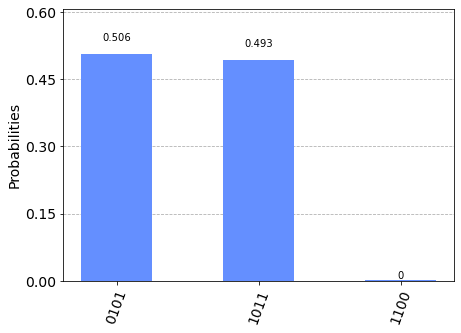

In [18]:
emulator = Aer.get_backend('qasm_simulator')
job =execute(qc, emulator, shots=2048 )
hist = job.result().get_counts()
plot_histogram(hist)

In [19]:
measured_str = max(hist, key=hist.get)

In [20]:
measured_int = int(measured_str,2)
print("Register Output = %i" % measured_int)

Register Output = 5


In [21]:
theta = (measured_int/(2**t))*math.pi*2
print("Theta = %.5f" % theta)

Theta = 1.96350


In [22]:
N = 2**n
M = N * (math.sin(theta/2)**2)
print("No. of Solutions = %.1f" % (N-M))

No. of Solutions = 4.9


In [23]:
m = t - 1
err = (math.sqrt(2*M*N) + N/(2**(m-1)))*(2**(-m))
print("Error < %.2f" % err)

Error < 2.85


In [25]:
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    print("No. of Solutions = %.1f" % (N-M))
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m-1)))*(2**(-m))
    print("Error < %.2f" % err)